<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/dbda/ch08-basic-models/single_coin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore') 

In [1]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

In [2]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

     |████████████████████████████████| 1.4MB 2.8MB/s 
     |████████████████████████████████| 4.1MB 17.7MB/s 
     |████████████████████████████████| 286kB 47.7MB/s 
     |████████████████████████████████| 911kB 2.8MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az

In [4]:
!rm -rf data-science-hw
!git clone https://github.com/ctarrington/data-science-hw.git

base_path = './data-science-hw/dbda/ch08-basic-models/'

Cloning into 'data-science-hw'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (155/155), done.
remote: Total 171 (delta 78), reused 27 (delta 6), pack-reused 0
Receiving objects: 100% (171/171), 4.19 MiB | 3.70 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [5]:
az.style.use('arviz-darkgrid')
%matplotlib inline

In [6]:
data = pd.read_csv(base_path+'data/flips.csv')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 1998.79it/s]


    mean    sd  hpd_3%  hpd_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
θ  0.302  0.06   0.192    0.414  ...   925.0     907.0    1531.0    1.0

[1 rows x 11 columns]


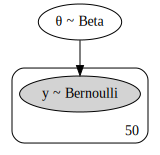

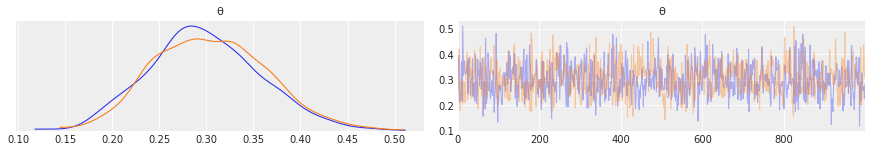

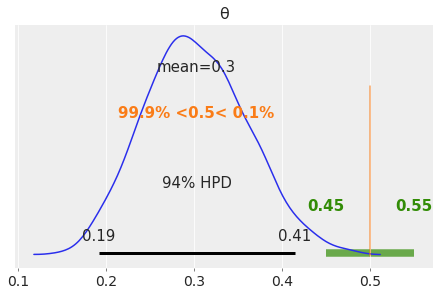

In [7]:
with pm.Model() as model:
  # uniform prior
  θ = pm.Beta('θ', alpha=1., beta=1.)
  # likelihood p(y|θ)
  y = pm.Bernoulli('y', p=θ, observed=data['flip'])
  trace = pm.sample(1000, random_seed=123)
  print(az.summary(trace))
  pm.traceplot(trace)
  az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=0.5)

pm.model_to_graphviz(model)
